## Cat and Dog classification CNN

### Libraries

In [2]:
import cv2
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#### Deleting duplicated data

In [3]:
import os
for i ,address in enumerate(glob.glob("/Users/narimanhosseinzadeh/Documents/Codes/python_ai/cat-dog/Cat_Dog/*/*/*")):
    if "(" in address:
        os.remove(address)

### Reading Data

In [4]:
data =[]
Lable = []
count = 0
from IPython.display import clear_output

for i ,address in enumerate(glob.glob("/Users/narimanhosseinzadeh/Documents/Codes/python_ai/cat-dog/Cat_Dog/*/*/*")):
    img = cv2.imread(address)
    img = cv2.resize(img,(64,64))
    img = img/255.0
    data.append(img)
    
    label = address.split("/")[-1].split(".")[0]
    Lable.append(label)
    
    if (i % 250) == 0:
        clear_output(wait=True)
        count+=1
        print(f"{count}% Done")
        
        
len(Lable)
len(data)
    
    
    

100% Done


25000

In [5]:
print(Lable.count("cat"))
print(Lable.count("dog"))

12500
12500


### Encoding Labels to 0 and 1 (cat,dog)

In [6]:
le = LabelEncoder()
Y = le.fit_transform(Lable)
Y = to_categorical(Y)
Y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

### Turning Images to numpy array

In [7]:
X = np.array(data)
X

array([[[[0.14509804, 0.07843137, 0.03921569],
         [0.29019608, 0.19215686, 0.12941176],
         [0.18431373, 0.09803922, 0.07058824],
         ...,
         [0.7254902 , 0.58039216, 0.4627451 ],
         [0.83921569, 0.68235294, 0.58431373],
         [0.91372549, 0.75294118, 0.65490196]],

        [[0.1372549 , 0.0745098 , 0.03137255],
         [0.28235294, 0.18431373, 0.12156863],
         [0.23137255, 0.14117647, 0.11372549],
         ...,
         [0.76470588, 0.56862745, 0.45882353],
         [0.81176471, 0.63137255, 0.50588235],
         [0.86666667, 0.70588235, 0.61176471]],

        [[0.14117647, 0.05882353, 0.03137255],
         [0.24705882, 0.16078431, 0.11764706],
         [0.33333333, 0.23921569, 0.19607843],
         ...,
         [0.71764706, 0.52156863, 0.43137255],
         [0.8       , 0.62352941, 0.50196078],
         [0.89411765, 0.76470588, 0.70196078]],

        ...,

        [[0.20392157, 0.13333333, 0.07058824],
         [0.14901961, 0.10588235, 0.07058824]

In [8]:
print(Y.shape,X.shape)

(25000, 2) (25000, 64, 64, 3)


### Spliting Data using train_test_split

In [17]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,random_state=42,shuffle=True,test_size=0.2)

In [18]:
print(Xtest.shape,Xtrain.shape,Ytest.shape,Ytrain.shape)

(5000, 64, 64, 3) (20000, 64, 64, 3) (5000, 2) (20000, 2)


### Data augmentation 

In [19]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(Xtrain) 

In [20]:
datagen1 = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen1.fit(Xtest) 

### Reducing Learning rate by 0.5 for 3 epochs if no improvement accure on val_loss

In [21]:

lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)

### Model architecture  

In [22]:
network = models.Sequential([
    
    layers.Conv2D(16,(3,3),activation="relu",
                  input_shape=(64,64,3)),
    layers.MaxPool2D(),
    
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPool2D(),
    
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPool2D(),
    
    layers.Conv2D(128,(3,3),activation="relu"),
    layers.MaxPool2D(),
    
    
    layers.Flatten(),
    
    
    layers.Dense(256,activation="relu"),
    layers.Dropout(0.3),
    
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.2),
    

    layers.Dense(2,activation="softmax")
    ])

network.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,922 (1023.13 KB)

 Trainable params: 261,922 (1023.13 KB)

 Non-trainable params: 0 (0.00 B)

### Training The Model 

In [23]:
network.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

H = network.fit(
    datagen.flow(Xtrain,Ytrain),
    batch_size = 64,
    validation_data = datagen1.flow(Xtest,Ytest),
    epochs =30,
    callbacks = [lr_scheduler]
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.5396 - loss: 0.6891 - val_accuracy: 0.5956 - val_loss: 0.6697 - learning_rate: 0.0010
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6055 - loss: 0.6580 - val_accuracy: 0.6546 - val_loss: 0.6298 - learning_rate: 0.0010
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6573 - loss: 0.6213 - val_accuracy: 0.6690 - val_loss: 0.6118 - learning_rate: 0.0010
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6776 - loss: 0.5889 - val_accuracy: 0.7116 - val_loss: 0.5627 - learning_rate: 0.0010
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7024 - loss: 0.5735 - val_accuracy: 0.7050 - val_loss: 0.5789 - learning_rate: 0.0010
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7132 - loss: 0.5562 - val_accuracy: 0.7268 - val_loss: 0.5404 - learning_rate: 0.0010
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.7364 - l

### Showing the Models Preformance using matplotlib

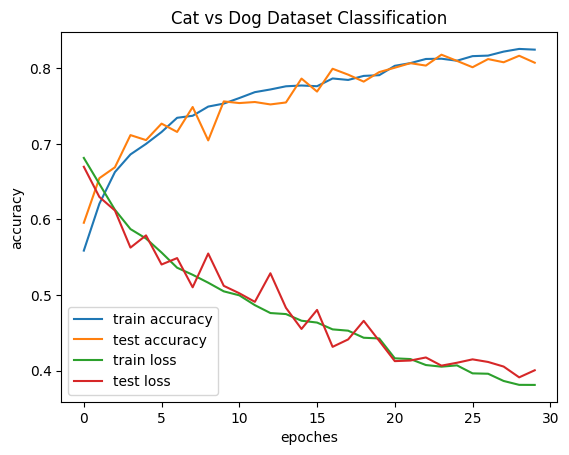

In [24]:

plt.plot(H.history["accuracy"], label="train accuracy")
plt.plot(H.history["val_accuracy"], label="test accuracy")
plt.plot(H.history["loss"], label="train loss")
plt.plot(H.history["val_loss"], label="test loss")
plt.legend()
plt.xlabel("epoches")
plt.ylabel("accuracy")
plt.title("Cat vs Dog Dataset Classification")
plt.show()


### Saving the Model

In [25]:
network.save("Cat_Dog_Classifier.h5")

### Using the saved Model to predict images 

In [3]:
network = tf.keras.models.load_model("Cat_Dog_Classifier.h5")

### Reading and preparing the images for Prediction

In [88]:
img_cat = cv2.imread("cat.jpg")
img_dog = cv2.imread("dog.jpg")

In [89]:
import matplotlib.pyplot as plt #mat plot lib for showing the prediction

In [90]:
#cat_img
c_img = cv2.resize(img_cat, (64, 64))
c_img = c_img / 255.0 
c_img = np.array([c_img])   
#dog_img
d_img = cv2.resize(img_dog, (64, 64))
d_img = d_img / 255.0 
d_img = np.array([d_img])   

In [91]:
prediction_cat = network.predict(c_img)
prediction_dog = network.predict(d_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [106]:
prediction_dog

array([[0.00596887, 0.99403113]], dtype=float32)

In [94]:
classes = ["cat","dog"]

In [95]:
index_d = np.argmax(prediction_dog)
index_c = np.argmax(prediction_cat)

In [ ]:
text_cat = f"{classes[index_c]}:{prediction_cat[0][index_c]*100:.2f}"
text_dog = f"{classes[index_d]}:{prediction_dog[0][index_d]*100:.2f}"

dog:99.40


In [124]:
img_cat = cv2.putText(img_cat, text_cat, (10, 30), cv2.FONT_HERSHEY_COMPLEX, 0.75, (0, 255, 0), 2)
img_dog = cv2.putText(img_dog, text_dog, (10, 30), cv2.FONT_HERSHEY_COMPLEX, 0.75, (0, 255, 0), 2)

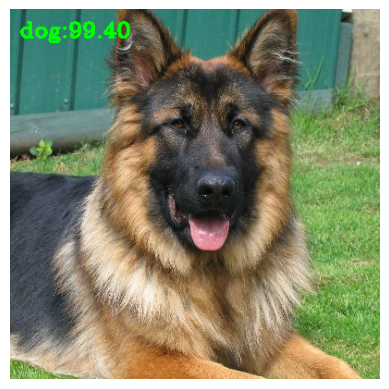

In [127]:
# Showing the Prediction of the Dog_image 
img_dog_rgb = cv2.cvtColor(img_dog, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(img_dog_rgb)


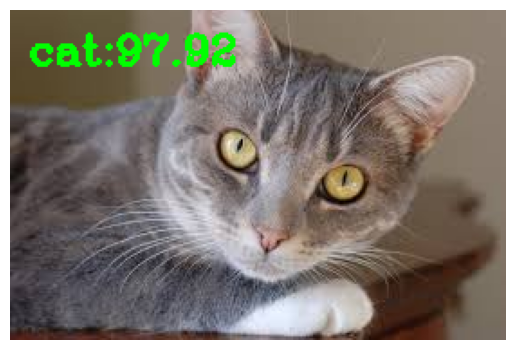

In [ ]:
#Showing the Prediction of the Cat_image
img_cat_rgb = cv2.cvtColor(img_cat, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(img_cat_rgb)